# Random Forest

### Data preprocessing

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split # for training and testing split
from sklearn.preprocessing import StandardScaler # for Feature scaling
from sklearn.ensemble import RandomForestClassifier  # for classifier
from sklearn.metrics import confusion_matrix # for making confusion matrix
from matplotlib.colors import ListedColormap # for visualisation
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]

In [3]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [4]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [5]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [6]:
X_train[0:10]

array([[    27,  57000],
       [    46,  28000],
       [    39, 134000],
       [    44,  39000],
       [    57,  26000],
       [    32, 120000],
       [    41,  52000],
       [    48,  74000],
       [    26,  86000],
       [    22,  81000]])

In [7]:
X_test[0:10]

array([[    46,  22000],
       [    59,  88000],
       [    28,  44000],
       [    48,  96000],
       [    29,  28000],
       [    30,  62000],
       [    47, 107000],
       [    29,  83000],
       [    40,  75000],
       [    42,  65000]])

In [8]:
y_train[0:10]

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0])

In [9]:
y_test[0:10]

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0])

In [11]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
X_train[0:10]

array([[-1.06675246, -0.38634438],
       [ 0.79753468, -1.22993871],
       [ 0.11069205,  1.853544  ],
       [ 0.60129393, -0.90995465],
       [ 1.87685881, -1.28811763],
       [-0.57615058,  1.44629156],
       [ 0.3069328 , -0.53179168],
       [ 0.99377543,  0.10817643],
       [-1.16487283,  0.45724994],
       [-1.55735433,  0.31180264]])

In [13]:
X_test[0:10]

array([[ 0.79753468, -1.40447546],
       [ 2.07309956,  0.51542886],
       [-0.96863208, -0.76450736],
       [ 0.99377543,  0.74814454],
       [-0.87051171, -1.22993871],
       [-0.77239133, -0.24089709],
       [ 0.89565505,  1.06812859],
       [-0.87051171,  0.36998156],
       [ 0.20881242,  0.13726589],
       [ 0.40505317, -0.15362871]])

### Fitting Random Forest Classifier to the Training set

In [14]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Predicting the Test set results

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
y_pred[0:10]

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [17]:
y_test[0:10]

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0])

### Making the Confusion Matrix

In [18]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[47,  5],
       [ 6, 22]])

* * *

**classifier made 47 + 22 = 69 correct prediction and 5 + 6 = 11 incoreect predictions.**

* * *

### Visualising the Training set results

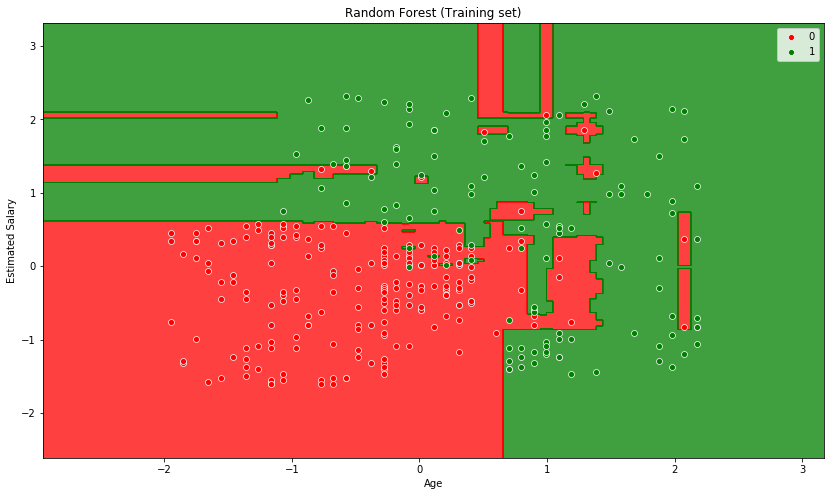

In [19]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j, edgecolors = 'white', linewidth = 0.7)
plt.title('Random Forest (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test set results

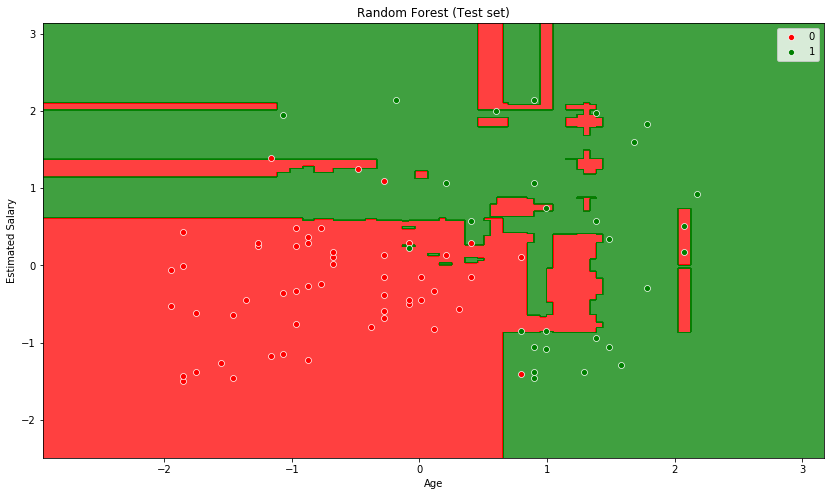

In [20]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j, edgecolors = 'white', linewidth = 0.7)
plt.title('Random Forest (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

***

**Things to remmember while making Random Forest classifier:**

* *For each user there are 10 trees making a prediction whether the user buys the SUV or not. The there is a vote of the majority prediction. If there is more yes, then the region is green and if there is more no, then the region is red.*

* *Normally it overfits the data. As you can see in above training set, it tries to catch all the red dots which is in the green region, if we look carefully. Also from the test set we can see that some green points were in the red region on the top right.*

* *There is no need to Scale the features as Random Forest does not depends on Euclidean distance. We are using Feature Scaling here just to get a plot with better resolution. For example if in above case you ommit scaling then while ploting you will get **MemoryError**.*

* * *